## Talkative Reward Community Engagement.

In [2]:
#Import required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sb
import re
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from plotly import express as px


In [3]:
#Checking for the current path directory
os.getcwd()

'C:\\Users\\USER\\Documents\\15DC Workspace\\WhatsappAnalysis'

In [6]:
#Read whatsapp text data into a list of string
def readFile(file):
    x= open(file, 'r', encoding='utf-8')
    y= x.read()
    content = y.splitlines()
    return content

In [7]:
#Call the function readFile to import the text data into python
data= readFile('Chat.txt')
len(data) #40671

40671

In [8]:
#Remove irrelevant messages/ system generated message; date people joined
join = [line for line in data if  "joined using this" in line]
join
#len(join)

["11/06/2022, 12:02 - You joined using this group's invite link",
 "11/06/2022, 15:51 - +234 701 000 5751 joined using this group's invite link",
 "11/06/2022, 22:42 - +234 805 429 3902 joined using this group's invite link",
 "13/06/2022, 07:09 - +234 816 682 7347 joined using this group's invite link",
 "14/06/2022, 12:22 - +234 806 548 3211 joined using this group's invite link",
 "14/06/2022, 12:24 - +234 813 001 1541 joined using this group's invite link",
 "15/06/2022, 17:07 - +234 915 335 3244 joined using this group's invite link",
 "16/06/2022, 07:14 - +234 906 332 7493 joined using this group's invite link",
 "16/06/2022, 17:17 - +234 812 200 0406 joined using this group's invite link",
 "16/06/2022, 17:19 - Jude Oruma Dsc joined using this group's invite link",
 "18/06/2022, 12:57 - +234 813 273 5880 joined using this group's invite link",
 "18/06/2022, 13:03 - +234 809 919 2881 joined using this group's invite link",
 "19/06/2022, 20:44 - +234 816 661 7463 joined using this

In [9]:
# Clean the data to remove empty lines 

data = [line.strip() for line in data]
print(f'The length of chat is : {len(data)} ')
# print(len(data))

#This cleans the join notification lines
clean_data = [line for line in data if not "joined using this" in line]
#Further cleaning
#Remove empty lines
clean_data = [line for line in clean_data if len(line) > 1]
print(f'The length of clean_chat is: {len(data)}')

The length of chat is : 40671 
The length of clean_chat is: 40671


In [10]:
#Check for persons who left the group'
left = [line for line in clean_data if line.endswith("left")]
print (f'The total number of persons that left the group is: {len(left)}')


The total number of persons that left the group is: 17


In [11]:
#Remove the left notificationi lines
clean_data = [line for line in clean_data if not line.endswith("left")]
print(len(clean_data))

#Notice it has reduced from 40671 to 35949

35949


In [10]:
# Nerge messages that belong together

msgs= [] #Message Container
count =0

for line in clean_data:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        count = count+1
    else:
        take = msgs[count -1] + ". " + line
        msgs.append(take)
        msgs.pop(count-1)
len(msgs)
#Unique messages

28249

In [11]:
msgs[0:10]

['29/11/2021, 11:11 - +234 813 294 3190 created group "💻 Developers Of Value  💻"',
 '11/06/2022, 12:23 - +234 816 508 8323: Hello Bosses, Plz  what is myql data type for only time?',
 '11/06/2022, 12:24 - +234 816 508 8323: Eg. 12:23:00',
 '11/06/2022, 12:28 - +234 906 597 1020: I think it datetime',
 '11/06/2022, 12:29 - Chris Imoni: <Media omitted>',
 '11/06/2022, 12:29 - Chris Imoni: Datetime is best to use',
 "11/06/2022, 12:30 - Odulaja Philip 🐍: What's myql",
 '11/06/2022, 12:31 - Chris Imoni: But if u wanna use it then map it with Java LocalTime',
 '11/06/2022, 12:31 - Omoba: I guess it is MySQL',
 "11/06/2022, 12:31 - Chris Imoni: It's MySQL"]

In [12]:
#Extract time
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time] # Remove spacing
print(f"length of time is: {len(time)}")

time

length of time is: 28249


['11:11',
 '12:23',
 '12:24',
 '12:28',
 '12:29',
 '12:29',
 '12:30',
 '12:31',
 '12:31',
 '12:31',
 '12:31',
 '12:32',
 '12:33',
 '12:33',
 '12:33',
 '12:34',
 '12:34',
 '12:38',
 '12:50',
 '12:57',
 '12:59',
 '13:01',
 '13:02',
 '13:02',
 '13:03',
 '13:04',
 '13:05',
 '13:05',
 '13:06',
 '13:06',
 '13:06',
 '13:07',
 '13:07',
 '13:17',
 '13:17',
 '13:17',
 '13:17',
 '13:18',
 '13:18',
 '13:20',
 '13:22',
 '13:53',
 '13:55',
 '13:56',
 '13:57',
 '13:58',
 '13:58',
 '13:59',
 '13:59',
 '14:00',
 '14:00',
 '14:02',
 '14:02',
 '14:02',
 '14:02',
 '14:03',
 '14:03',
 '14:03',
 '14:03',
 '14:05',
 '14:05',
 '14:05',
 '14:06',
 '14:07',
 '14:07',
 '14:07',
 '14:07',
 '14:07',
 '14:08',
 '14:10',
 '14:15',
 '14:15',
 '14:15',
 '14:16',
 '14:16',
 '14:17',
 '14:18',
 '14:18',
 '14:19',
 '14:26',
 '15:51',
 '15:51',
 '17:18',
 '17:20',
 '17:20',
 '17:20',
 '17:20',
 '17:21',
 '17:21',
 '17:21',
 '17:22',
 '17:22',
 '17:23',
 '17:23',
 '17:23',
 '17:23',
 '17:23',
 '17:23',
 '17:23',
 '17:23',


In [13]:
# Extract Date
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date)

28249

In [14]:
# Extract Group Memeber
member = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(member)

28249

In [15]:
#Extract Content
content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)

28249

In [16]:
# merge our date, time, Members and content data into a Dataframe

df = pd.DataFrame(list(zip(date, time, member, content)), columns = ['Date', 'Time', 'Members', 'Content'])
df

,Date,Time,Members,Content
0,29/11/2021,11:11,"+234 813 294 3190 created group ""💻 Developers...",Missing Text
1,11/06/2022,12:23,+234 816 508 8323,"Hello Bosses, Plz what is myql data type for..."
2,11/06/2022,12:24,+234 816 508 8323,Eg. 12
3,11/06/2022,12:28,+234 906 597 1020,I think it datetime
4,11/06/2022,12:29,Chris Imoni,<Media omitted>
...,...,...,...,...
28244,30/12/2022,13:25,Odulaja Philip 🐍,The man for the job are
28245,30/12/2022,13:25,Odulaja Philip 🐍,I don't know if @2347061134732 uses C#
28246,30/12/2022,13:25,Odulaja Philip 🐍,Any other C# Developer here should let us kno...
28247,30/12/2022,14:07,+234 806 455 5076,<Media omitted>


In [17]:
# Drop Missing Text values

df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df

,Date,Time,Members,Content
0,11/06/2022,12:23,+234 816 508 8323,"Hello Bosses, Plz what is myql data type for..."
1,11/06/2022,12:24,+234 816 508 8323,Eg. 12
2,11/06/2022,12:28,+234 906 597 1020,I think it datetime
3,11/06/2022,12:29,Chris Imoni,<Media omitted>
4,11/06/2022,12:29,Chris Imoni,Datetime is best to use
...,...,...,...,...
28207,30/12/2022,13:25,Odulaja Philip 🐍,The man for the job are
28208,30/12/2022,13:25,Odulaja Philip 🐍,I don't know if @2347061134732 uses C#
28209,30/12/2022,13:25,Odulaja Philip 🐍,Any other C# Developer here should let us kno...
28210,30/12/2022,14:07,+234 806 455 5076,<Media omitted>


In [18]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['DateTime']

0       2022-11-06 12:23:00
1       2022-11-06 12:24:00
2       2022-11-06 12:28:00
3       2022-11-06 12:29:00
4       2022-11-06 12:29:00
                ...        
28207   2022-12-30 13:25:00
28208   2022-12-30 13:25:00
28209   2022-12-30 13:25:00
28210   2022-12-30 14:07:00
28211   2022-12-30 14:49:00
Name: DateTime, Length: 28212, dtype: datetime64[ns]

In [19]:
#Create Month Column

df['Month'] = df['DateTime'].apply(lambda x: x.month_name())

In [20]:
#Create Weekday Column

df['weekday'] = df['DateTime'].apply(lambda x: x.day_name())

In [21]:
#split our Content column to create new columns showing the number of letters and words contained in each message.
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))

In [22]:
#split our Time column to create a new column named Hour showing the hour of the day a message was sent
df['Hour'] = df['Time'].apply(lambda x : x.split(':')[0]) 
# The first token of a value in the Time Column contains the hour (Eg., "12" in "12:15")

In [23]:
#print first five rows of our dataframe
df.head()

,Date,Time,Members,Content,DateTime,Month,weekday,Letter_Count,Word_Count,Hour
0,11/06/2022,12:23,+234 816 508 8323,"Hello Bosses, Plz what is myql data type for...",2022-11-06 12:23:00,November,Sunday,57,13,12
1,11/06/2022,12:24,+234 816 508 8323,Eg. 12,2022-11-06 12:24:00,November,Sunday,7,3,12
2,11/06/2022,12:28,+234 906 597 1020,I think it datetime,2022-11-06 12:28:00,November,Sunday,20,5,12
3,11/06/2022,12:29,Chris Imoni,<Media omitted>,2022-11-06 12:29:00,November,Sunday,16,3,12
4,11/06/2022,12:29,Chris Imoni,Datetime is best to use,2022-11-06 12:29:00,November,Sunday,24,6,12


In [24]:
df.columns.to_list()

['Date',
 'Time',
 'Members',
 'Content',
 'DateTime',
 'Month',
 'weekday',
 'Letter_Count',
 'Word_Count',
 'Hour']

In [25]:
#Most Active Member of the Community

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28212 entries, 0 to 28211
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          28212 non-null  object        
 1   Time          28212 non-null  object        
 2   Members       28212 non-null  object        
 3   Content       28212 non-null  object        
 4   DateTime      28212 non-null  datetime64[ns]
 5   Month         28212 non-null  object        
 6   weekday       28212 non-null  object        
 7   Letter_Count  28212 non-null  int64         
 8   Word_Count    28212 non-null  int64         
 9   Hour          28212 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 2.2+ MB


In [ ]:
plt.figure(figsize=(9,6))


In [27]:
#Total memebers in the Community
len(df.Members.unique())

337

In [33]:
#Most Active
MA= df.groupby('Members')['Word_Count'].count().sort_values(ascending=False).head(1)
MA

Members
 Odulaja Philip 🐍    7588
Name: Word_Count, dtype: int64

In [77]:
#Top 10 Members Engagement in the Community

df.groupby('Members')['Content'].count().sort_values(ascending=False).head(10)

Members
 Odulaja Philip 🐍     7588
 +234 807 543 0747    1400
 +234 813 062 5365    1371
 Walex BabyCode 🐍     1366
 waleh jones 🐍        1000
 Chris Imoni          1000
 +234 816 508 8323     896
 +234 907 704 6324     860
 +234 811 947 4066     841
 +234 706 462 0806     797
Name: Content, dtype: int64

In [28]:
lenghtOfText= df.groupby(['Members'])['Word_Count'].sum()
lenghtOfText

Members
 +1 (246) 825          1790
 +1 (647) 674            42
 +1 (901) 602          5565
 +220 258 0227            7
 +234 701 000 5751      837
                      ...  
 Oladayo Cxc             26
 Omoba                 1544
 Walex BabyCode 🐍     11666
 ZAKARI ABUBAKAR        203
 waleh jones 🐍        11634
Name: Word_Count, Length: 337, dtype: int64

In [43]:
month_chat = df.groupby(df['Month'])['Members'].count().sort_values(ascending=False)
month_chat

Month
June         4999
November     4452
December     4126
September    3894
July         2961
August       2518
October      2335
January      1023
March         649
April         476
February      428
May           351
Name: Members, dtype: int64

In [31]:
chat_hour = df.groupby(['Time'])['Content'].count().sort_values()
chat_hour

Time
05:38     1
02:59     1
03:01     1
05:32     1
05:33     1
         ..
21:23    59
21:25    59
21:29    60
21:22    67
21:28    74
Name: Content, Length: 1296, dtype: int64

In [35]:
df.describe()

,Letter_Count,Word_Count
count,28212.000000,28212.000000
mean,43.289841,9.023855
std,60.594727,10.822430
min,2.000000,2.000000
25%,13.000000,3.000000
50%,25.000000,6.000000
75%,53.000000,11.000000
max,1865.000000,220.000000


In [42]:
df.Month.unique()

array(['November', 'December', 'June', 'January', 'February', 'March',
       'April', 'May', 'July', 'August', 'September', 'October'],
      dtype=object)

In [80]:
#Engagement of Members on daily basis
Week_chat = df.groupby(df['weekday'])['Content'].count().sort_values(ascending=False)
Week_chat

weekday
Friday       5083
Tuesday      4179
Thursday     4087
Wednesday    3960
Saturday     3869
Monday       3810
Sunday       3224
Name: Content, dtype: int64

<AxesSubplot:>

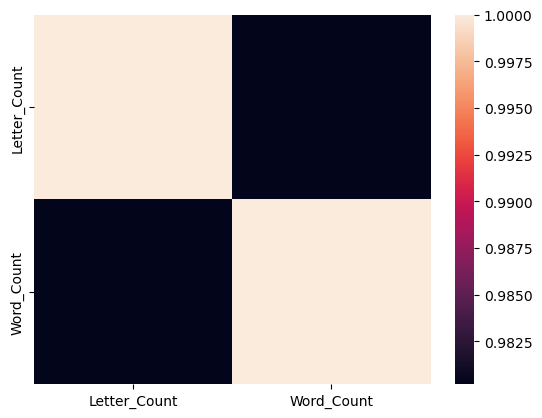

In [46]:
sb.heatmap(correlation)

In [49]:
df.dtypes

Date                    object
Time                    object
Members                 object
Content                 object
DateTime        datetime64[ns]
Month                   object
weekday                 object
Letter_Count             int64
Word_Count               int64
Hour                    object
dtype: object

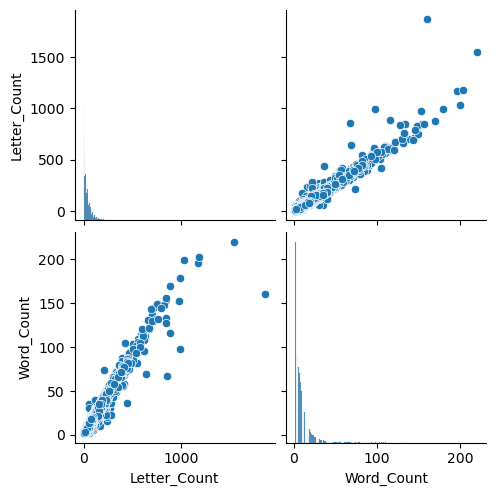

In [51]:
sb.pairplot(df)

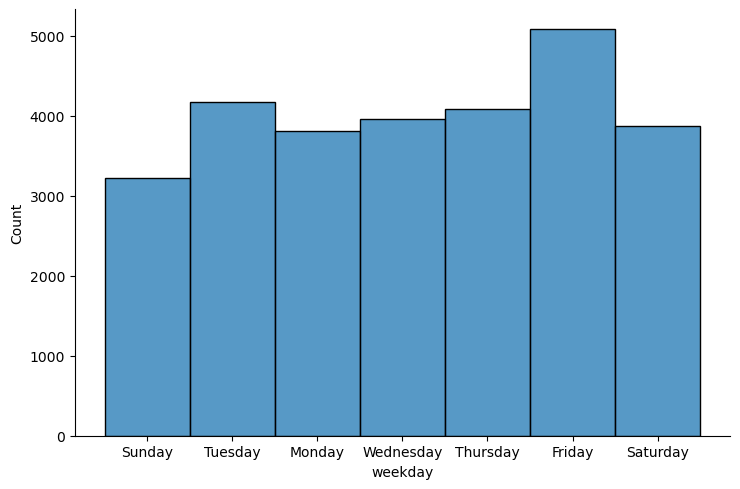

In [94]:
sb.displot(df['weekday'], aspect=1.5)

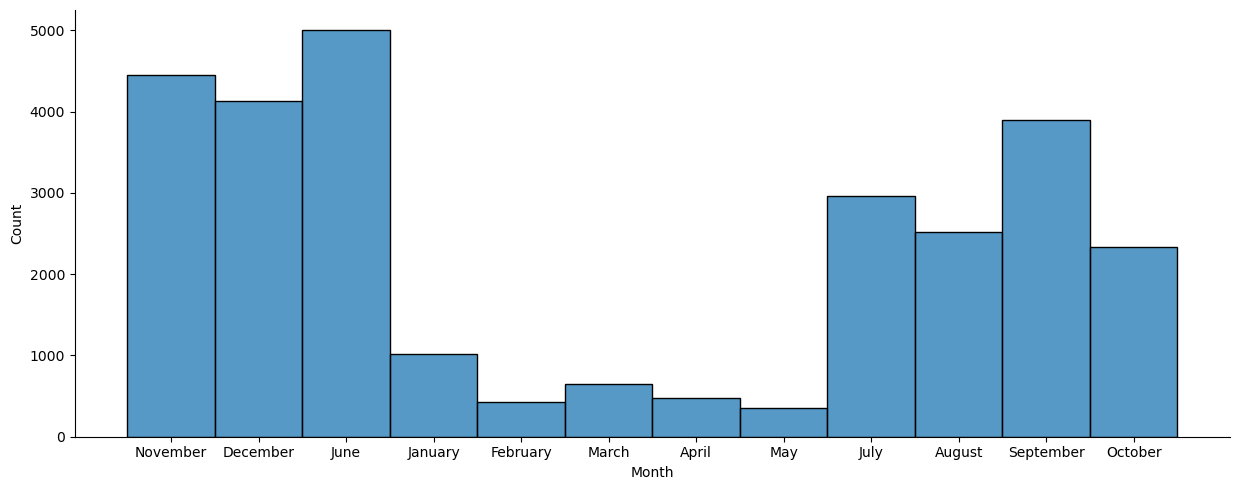

In [92]:
sb.displot(df['Month'], aspect=2.5)

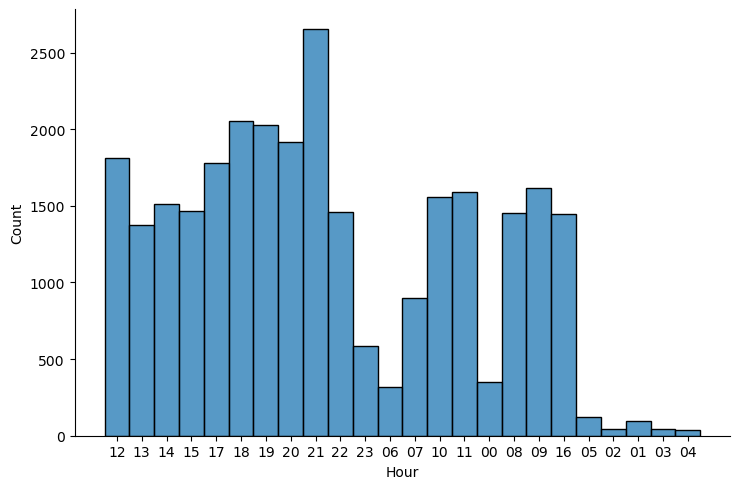

In [95]:
sb.displot(df['Hour'], aspect=1.5)